<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подключение-к-БД" data-toc-modified-id="Подключение-к-БД-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подключение к БД</a></span></li><li><span><a href="#Распределение-пользователей-по-странам" data-toc-modified-id="Распределение-пользователей-по-странам-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Распределение пользователей по странам</a></span></li><li><span><a href="#Распределение-пользователей-по-временным-зонам" data-toc-modified-id="Распределение-пользователей-по-временным-зонам-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Распределение пользователей по временным зонам</a></span></li><li><span><a href="#Распределение-пользователей-по-устройствам" data-toc-modified-id="Распределение-пользователей-по-устройствам-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Распределение пользователей по устройствам</a></span></li><li><span><a href="#Daily-Revenue" data-toc-modified-id="Daily-Revenue-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Daily Revenue</a></span></li><li><span><a href="#DAU-(Daily-Active-Users)" data-toc-modified-id="DAU-(Daily-Active-Users)-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>DAU (Daily Active Users)</a></span></li><li><span><a href="#ARPDAU-(Average-Revenue-Per-Daily-Active-User)" data-toc-modified-id="ARPDAU-(Average-Revenue-Per-Daily-Active-User)-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>ARPDAU (Average Revenue Per Daily Active User)</a></span></li><li><span><a href="#New-Installs" data-toc-modified-id="New-Installs-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>New Installs</a></span></li><li><span><a href="#RR-(Retention-Rate)" data-toc-modified-id="RR-(Retention-Rate)-9"><span class="toc-item-num">9&nbsp;&nbsp;</span>RR (Retention Rate)</a></span></li><li><span><a href="#Daily-Conversion-Rate" data-toc-modified-id="Daily-Conversion-Rate-10"><span class="toc-item-num">10&nbsp;&nbsp;</span>Daily Conversion Rate</a></span></li><li><span><a href="#ARPPU-(Average-Revenue-Per-Paying-User)" data-toc-modified-id="ARPPU-(Average-Revenue-Per-Paying-User)-11"><span class="toc-item-num">11&nbsp;&nbsp;</span>ARPPU (Average Revenue Per Paying User)</a></span></li><li><span><a href="#Last-Click" data-toc-modified-id="Last-Click-12"><span class="toc-item-num">12&nbsp;&nbsp;</span>Last Click</a></span></li><li><span><a href="#Выводы" data-toc-modified-id="Выводы-13"><span class="toc-item-num">13&nbsp;&nbsp;</span>Выводы</a></span></li></ul></div>

### Подключение к БД

In [1]:
# Импортируем необходимые библиотеки
import pandas as pd
import plotly.express as px
from plotly import graph_objects as go
from sqlalchemy import text, create_engine
import plotly.io as pio
from IPython.display import display, Image

# Установим параметры для подключения к БД
db_config = {'user': 'student', # имя пользователя
'pwd': '6ecf4d61', # пароль
'host': '92.63.70.133',
'port': 5432, # порт подключения
'db': 'project'} # название базы данных
connection_string = 'postgresql://{user}:{pwd}@{host}:{port}/{db}'.format(**db_config)

# Сохраним коннектор
engine = create_engine(connection_string, connect_args={'sslmode':'disable'})

### Распределение пользователей по странам

In [2]:
# Выполняем SQL-запрос и присваиваем в переменную для дальнейшей визуализации
query = '''SELECT ui.country,
                  COUNT(distinct ui.user_id) as count_users
           FROM project.mobile_game.user_info as ui
           GROUP BY ui.country
           ORDER BY count_users desc'''

con=engine.connect()

count_users_per_country = pd.io.sql.read_sql(sql=text(query), con = con)

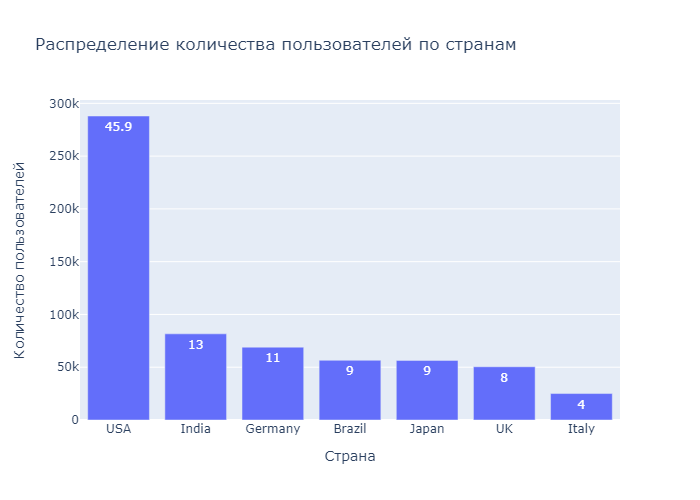

In [3]:
# Создадим интерактивный график распределения по каждой стране
count_users_per_country['share, %'] = round(count_users_per_country['count_users']\
                                                           / count_users_per_country['count_users']\
                                                           .sum() * 100, 1)

fig = px.bar(count_users_per_country, x='country', y='count_users',\
             title='Распределение количества пользователей по странам', text='share, %')

fig.update_layout(xaxis_title='Страна',
                  yaxis_title='Количество пользователей',
                  showlegend=False
                 )

static_image_bytes = pio.to_image(fig, format='png')
display(Image(static_image_bytes))

Около половины всех пользователей приложения находятся в США. Наименьшее число фиксируется в Италии.

### Распределение пользователей по временным зонам

In [4]:
# Выполняем SQL-запрос и присваиваем в переменную для дальнейшей визуализации
query = '''SELECT ui.timezone,
                  COUNT(distinct ui.user_id) as count_users
           FROM project.mobile_game.user_info as ui
           GROUP BY ui.timezone
           ORDER BY count_users desc'''

con=engine.connect()

count_users_per_timezone = pd.io.sql.read_sql(sql=text(query), con = con)

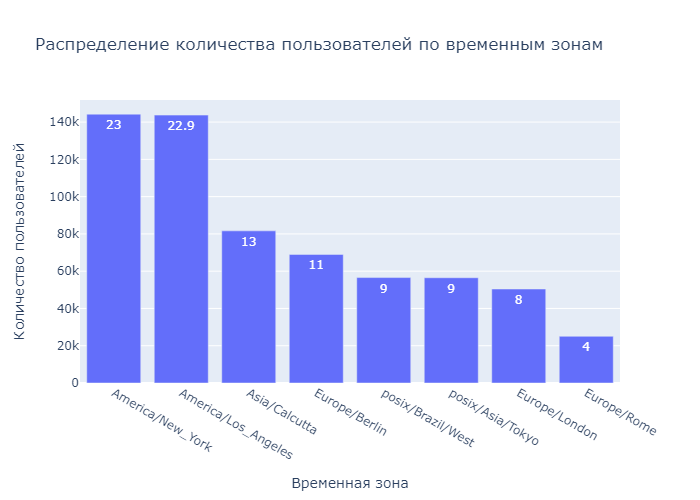

In [5]:
# Создадим интерактивный график распределения по каждой временной зоне
count_users_per_timezone['share, %'] = round(count_users_per_timezone['count_users']\
                                                           / count_users_per_timezone['count_users']\
                                                           .sum() * 100, 1)

fig = px.bar(count_users_per_timezone, x='timezone', y='count_users',\
             title='Распределение количества пользователей по временным зонам', text='share, %')

fig.update_layout(xaxis_title='Временная зона',
                  yaxis_title='Количество пользователей',
                  showlegend=False
                 )

static_image_bytes = pio.to_image(fig, format='png')
display(Image(static_image_bytes))

Почти половина всех пользователей располагаются во временных зонах городов США. 

### Распределение пользователей по устройствам

In [6]:
# Выполняем SQL-запрос и присваиваем в переменную для дальнейшей визуализации
query = '''SELECT ui.platform,
                  COUNT(distinct ui.user_id) as count_users
           FROM project.mobile_game.user_info as ui
           GROUP BY ui.platform
           ORDER BY count_users desc'''

con=engine.connect()

count_users_per_platform = pd.io.sql.read_sql(sql=text(query), con = con)

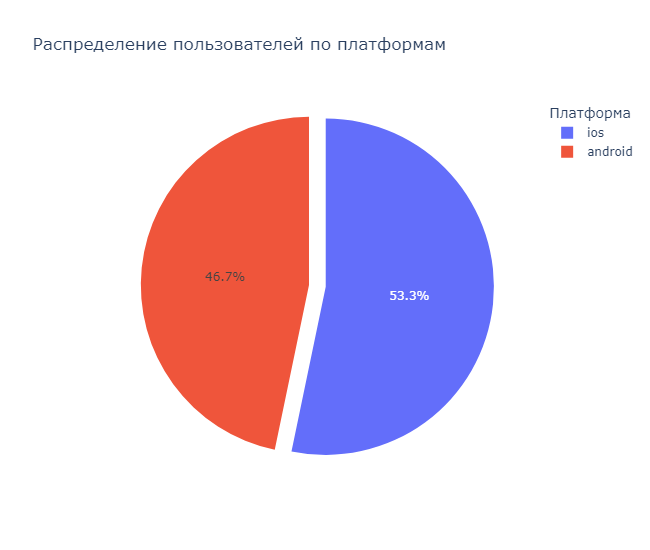

In [7]:
# Создадим интерактивный график распределения по каждой платформе
fig = go.Figure(data=[go.Pie(labels=count_users_per_platform['platform'], 
                                    values=count_users_per_platform['count_users'],
                                    pull = [0.1, 0])]
               )

fig.update_layout(title='Распределение пользователей по платформам', 
                  legend_title='Платформа',
                  width=650, 
                  height=550,
                  )

static_image_bytes = pio.to_image(fig, format='png')
display(Image(static_image_bytes))

Пользователи распределились практически равномерно между двумя мобильными платформами. Чуть больше юзеров предпочитают ios.

### Daily Revenue

In [8]:
# Выполняем SQL-запрос и присваиваем в переменную для дальнейшей визуализации
query = '''SELECT t.event_date as date, 
                  SUM(t.revenue) AS daily_revenue
           FROM project.mobile_game.transactions as t
           GROUP BY date
           ORDER BY date'''

con=engine.connect()

daily_revenue = pd.io.sql.read_sql(sql=text(query), con = con)

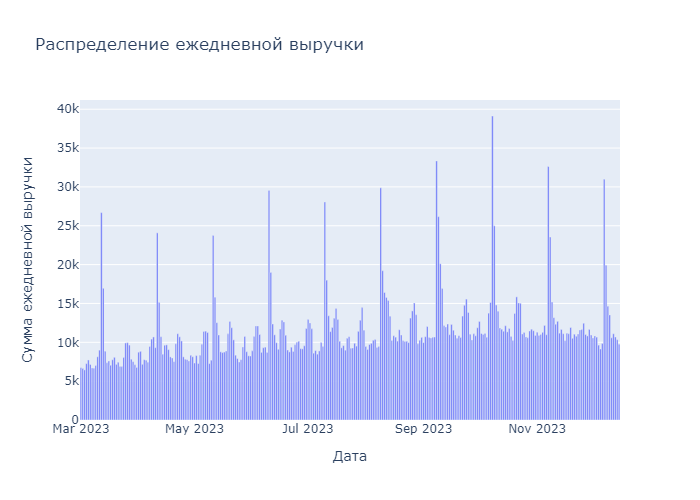

In [9]:
# Создадим интерактивный график распределения по каждому дню
fig = px.bar(daily_revenue, x='date', y='daily_revenue', title='Распределение ежедневной выручки')

fig.update_layout(xaxis_title='Дата',
                  yaxis_title='Сумма ежедневной выручки',
                  showlegend=False
                 )

static_image_bytes = pio.to_image(fig, format='png')
display(Image(static_image_bytes))

На графике также отмечаются аномальные ежемесячные скачки, характер которых трудно выявить однозначно. Скачки могут совпадать с проведением акций/скидок, обновлением контента (новые уровни, персонажи или функции) или периодическими событиями (ивентами), что в свою очередь стимулирует пользователей на дополнительные покупки.

Для более точного анализа необходима информация о датах проведения маркетинговых компаний, которые могли стимулировать пользователей.

In [10]:
# Выполняем SQL-запрос и присваиваем в переменную для дальнейшей визуализации
query = '''SELECT DATE_TRUNC('month', event_date) AS month,
                  sum(daily_revenue) AS monthly_revenue
FROM (SELECT DATE(t.event_date) AS event_date,
             SUM(t.revenue) AS daily_revenue
      FROM project.mobile_game.transactions as t
      GROUP BY DATE(t.event_date)) as daily_revenue_table
GROUP BY month
ORDER BY month'''

con=engine.connect()

monthly_revenue = pd.io.sql.read_sql(sql=text(query), con = con)

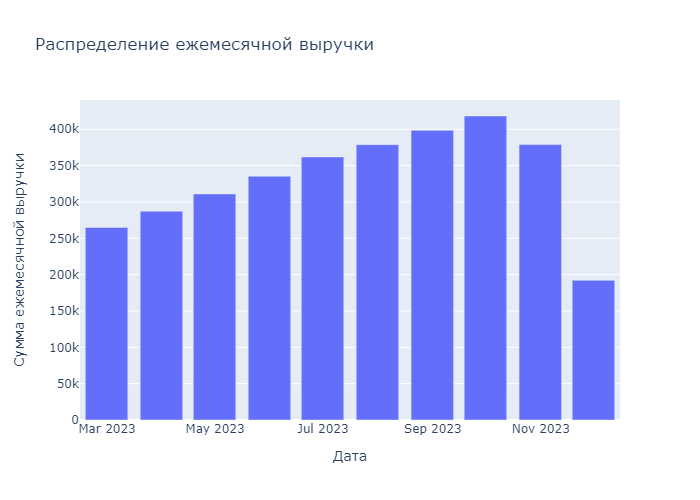

In [11]:
# Создадим интерактивный график распределения по каждому месяцу
fig = px.bar(monthly_revenue, x='month', y='monthly_revenue', title='Распределение ежемесячной выручки')

fig.update_layout(xaxis_title='Дата',
                  yaxis_title='Сумма ежемесячной выручки',
                  showlegend=False
                 )

static_image_bytes = pio.to_image(fig, format='png')
display(Image(static_image_bytes))

В целом фиксируется постепенное увеличение ежемесячной выручки с транзакций в приложении c марта по сентябрь 2023 года, однако в ноябре отмечается первый спад до уровня июля 2023 года.

### DAU (Daily Active Users)

In [12]:
# Выполняем SQL-запрос и присваиваем в переменную для дальнейшей визуализации
query = '''SELECT DATE(s.session_start_time) AS date, 
                  COUNT(DISTINCT s.user_id) AS DAU
           FROM project.mobile_game.sessions as s
           GROUP BY DATE(s.session_start_time)
           ORDER BY date'''

con=engine.connect()

dau = pd.io.sql.read_sql(sql=text(query), con = con)

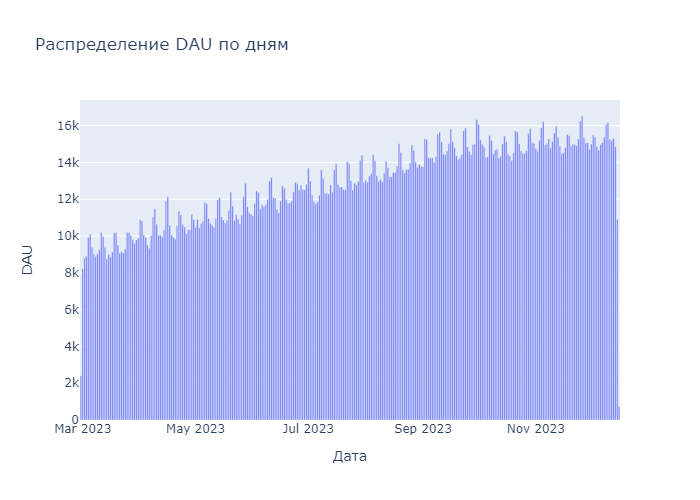

In [13]:
# Создадим интерактивный график распределения по каждому дню
fig = px.bar(dau, x='date', y='dau', title='Распределение DAU по дням')

fig.update_layout(xaxis_title='Дата',
                  yaxis_title='DAU',
                  showlegend=False
                 )

static_image_bytes = pio.to_image(fig, format='png')
display(Image(static_image_bytes))

Отмечается постепенное увеличение количества уникальных пользователей, которые имели сессии в каждый день вплоть до октября 2023 года. В последствии количество таких пользователей остается постоянным.

### ARPDAU (Average Revenue Per Daily Active User)

In [14]:
# Выполняем SQL-запрос и присваиваем в переменную для дальнейшей визуализации
query = '''
WITH daily_revenue AS (SELECT DATE(t.event_date) AS date, 
                              SUM(t.revenue) AS total_revenue
                       FROM project.mobile_game.transactions as t
                       GROUP BY DATE(t.event_date)),
                                  
daily_active_users AS (SELECT DATE(s.session_start_time) AS date, 
                              COUNT(DISTINCT s.user_id) AS DAU
                       FROM project.mobile_game.sessions as s
                       GROUP BY DATE(s.session_start_time))
                       
SELECT dr.date, 
       dr.total_revenue / dau.DAU AS ARPDAU
FROM daily_revenue as dr
JOIN daily_active_users as dau ON dr.date = dau.date
ORDER BY dr.date'''

con=engine.connect()

ARPDAU = pd.io.sql.read_sql(sql=text(query), con = con)

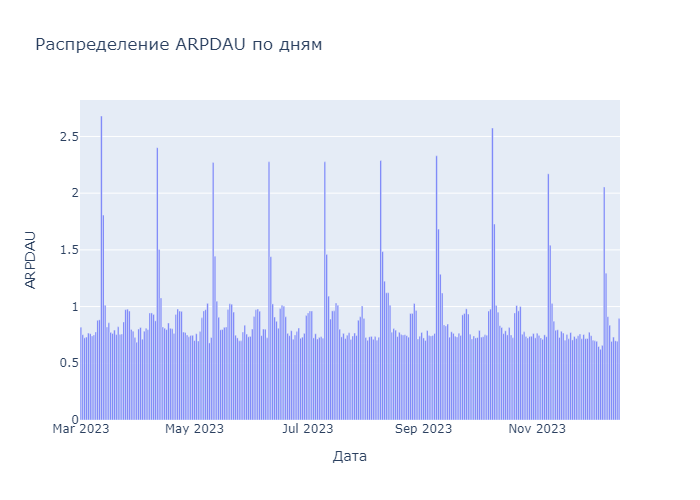

In [15]:
# Создадим интерактивный график распределения по каждому дню
fig = px.bar(ARPDAU, x='date', y='arpdau', title='Распределение ARPDAU по дням')

fig.update_layout(xaxis_title='Дата',
                  yaxis_title='ARPDAU',
                  showlegend=False
                 )

static_image_bytes = pio.to_image(fig, format='png')
display(Image(static_image_bytes))

В среднем ARPDAU сохраняется на протяжении всего времени, однако на графике вновь прослеживаются аномальные ежемесячные скачки.

### New Installs

In [16]:
# Выполняем SQL-запрос и присваиваем в переменную для дальнейшей визуализации
query = '''SELECT DATE(ui.user_start_date) AS date, 
                  COUNT(ui.user_id) AS new_installs
           FROM project.mobile_game.user_info as ui
           GROUP BY DATE(ui.user_start_date)
           ORDER BY date'''

con=engine.connect()

new_installs = pd.io.sql.read_sql(sql=text(query), con = con)

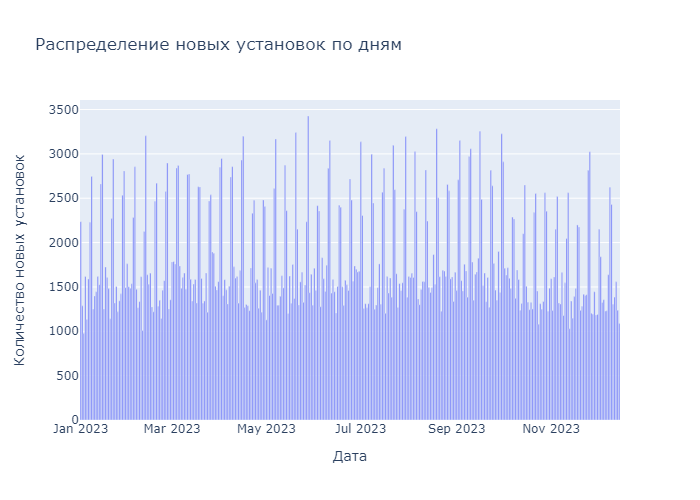

In [17]:
# Создадим интерактивный график распределения по каждому дню
fig = px.bar(new_installs, x='date', y='new_installs', title='Распределение новых установок по дням')

fig.update_layout(xaxis_title='Дата',
                  yaxis_title='Количество новых установок',
                  showlegend=False
                 )

static_image_bytes = pio.to_image(fig, format='png')
display(Image(static_image_bytes))

На графике отмечаются еженедельные скачки количества новых установок, характер которых неясен. Средний уровень количества новых установок сохраняется по октябрь 2023 года, после чего фиксируется небольшой спад.

### RR (Retention Rate)

In [18]:
# Выполняем SQL-запрос и присваиваем в переменную для дальнейшей визуализации
query = '''
WITH installs AS (SELECT ui.user_id, 
                  DATE(ui.user_start_date) AS install_date
                  FROM project.mobile_game.user_info as ui),
                             
retention AS (SELECT i.install_date, 
                     COUNT(DISTINCT s.user_id) AS retained_users
              FROM installs as i
              JOIN project.mobile_game.sessions as s ON i.user_id = s.user_id
                   AND DATE(s.session_start_time) = i.install_date + INTERVAL '1 day'
              GROUP BY i.install_date)
              
SELECT i.install_date as date, 
       CASE 
            WHEN COUNT(i.user_id) = 0 THEN 0
            ELSE r.retained_users::float / COUNT(i.user_id)::float * 100 
       END AS RR
FROM installs as i
JOIN retention r ON i.install_date = r.install_date
GROUP BY date, r.retained_users
ORDER BY date'''

con=engine.connect()

retention_rate = pd.io.sql.read_sql(sql=text(query), con = con)

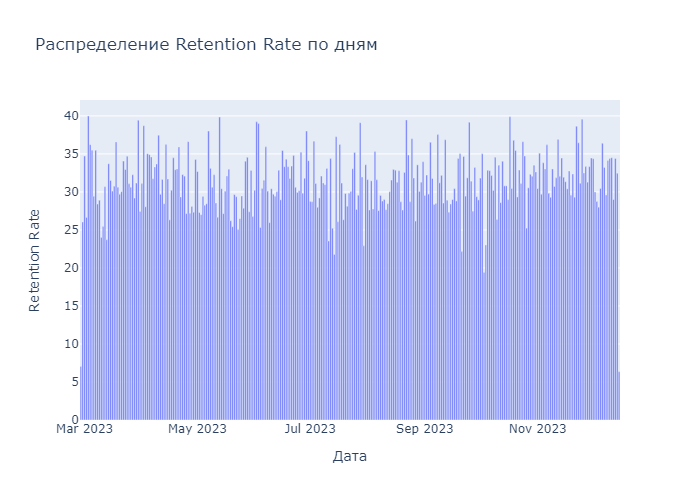

In [19]:
# Создадим интерактивный график распределения по каждому дню
fig = px.bar(retention_rate, x='date', y='rr', title='Распределение Retention Rate по дням')

fig.update_layout(xaxis_title='Дата',
                  yaxis_title='Retention Rate',
                  showlegend=False
                 )

static_image_bytes = pio.to_image(fig, format='png')
display(Image(static_image_bytes))

Процент пользователей, которые вернулись в приложение на следующий день после установки, в среднем, ведет себя достаточно стабильно на протяжении всего времени и изменяется в диапазоне от 19 до 40 %.

### Daily Conversion Rate

In [20]:
# Выполняем SQL-запрос и присваиваем в переменную для дальнейшей визуализации
query = '''
WITH daily_active_users AS (SELECT DATE(s.session_start_time) AS date, 
                                   COUNT(DISTINCT s.user_id) AS DAU
                            FROM project.mobile_game.sessions as s
                            GROUP BY DATE(s.session_start_time)),
                            
daily_payers AS (SELECT DATE(t.event_date) AS date, 
                        COUNT(DISTINCT t.user_id) AS payers
                 FROM project.mobile_game.transactions as t
                 GROUP BY DATE(t.event_date))
                 
SELECT dau.date, 
       COALESCE(dp.payers, 0)::float / dau.DAU * 100 AS daily_conversion_rate
FROM daily_active_users as dau
LEFT JOIN daily_payers as dp ON dau.date = dp.date
ORDER BY dau.date'''

con=engine.connect()

daily_conversion_rate = pd.io.sql.read_sql(sql=text(query), con = con)

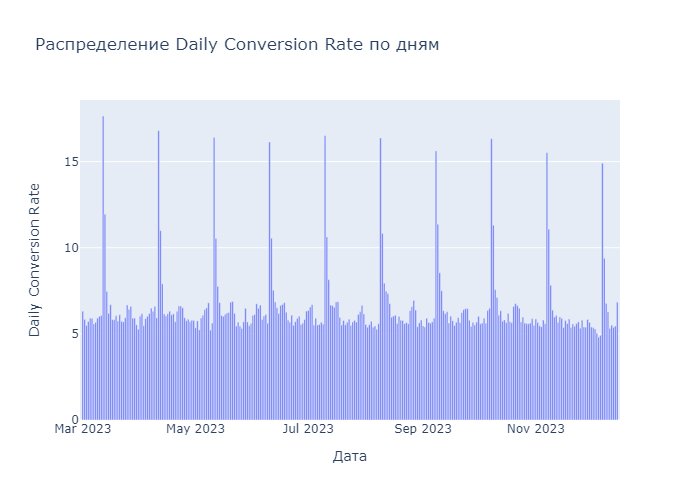

In [21]:
# Создадим интерактивный график распределения по каждому дню
fig = px.bar(daily_conversion_rate, x='date', y='daily_conversion_rate', title='Распределение Daily Conversion Rate по дням')

fig.update_layout(xaxis_title='Дата',
                  yaxis_title='Daily Conversion Rate',
                  showlegend=False
                 )

static_image_bytes = pio.to_image(fig, format='png')
display(Image(static_image_bytes))

Ежедневный коэффициент конверсии также ведет себя достаточно стабильно и сохраняется на уровне 5-6 %. Также вновь наблюдаются ежемесячные скачки метрики.

### ARPPU (Average Revenue Per Paying User)

In [22]:
# Выполняем SQL-запрос и присваиваем в переменную для дальнейшей визуализации
query = '''
WITH daily_payers AS (SELECT DATE(t.event_date) AS date, 
                             COUNT(DISTINCT t.user_id) AS payers
                      FROM project.mobile_game.transactions as t
                      GROUP BY DATE(t.event_date)),
                      
daily_revenue AS (SELECT DATE(t.event_date) AS date, 
                         SUM(t.revenue) AS total_revenue
                  FROM project.mobile_game.transactions as t
                  GROUP BY DATE(t.event_date))
                  
SELECT dr.date, 
       dr.total_revenue / dp.payers AS ARPPU
FROM daily_revenue as dr
JOIN daily_payers as dp ON dr.date = dp.date
ORDER BY dr.date'''

con=engine.connect()

ARPPU = pd.io.sql.read_sql(sql=text(query), con = con)

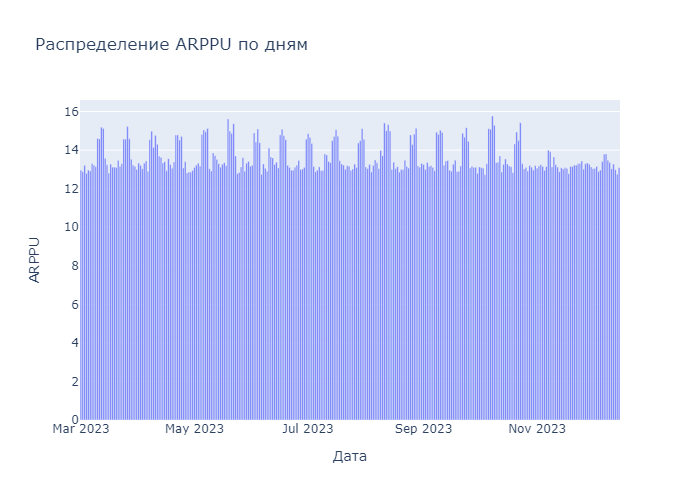

In [23]:
# Создадим интерактивный график распределения по каждому дню
fig = px.bar(ARPPU, x='date', y='arppu', title='Распределение ARPPU по дням')

fig.update_layout(xaxis_title='Дата',
                  yaxis_title='ARPPU',
                  showlegend=False
                 )

static_image_bytes = pio.to_image(fig, format='png')
display(Image(static_image_bytes))

Средняя выручка на пользователя, совершившего покупку, ведет себя достаточно стабильно на протяжении всего времени, сохраняясь на уровне 13$. Два раза в месяц отмечаются скачки метрики, причина которых, может быть, в сезонных ивентах.

### Last Click

In [24]:
# Выполняем SQL-запрос и присваиваем в переменную для дальнейшей визуализации
query = '''
WITH last_touch AS (SELECT ut.user_id, 
                           ut.channel,
                           ROW_NUMBER() OVER (PARTITION BY ut.user_id ORDER BY ut.touch_date DESC) AS rn
                    FROM project.mobile_game.users_touches as ut)
                    
SELECT lt.channel,
       COUNT(DISTINCT t.user_id) AS total_conversions,
       SUM(t.revenue) AS total_revenue
FROM last_touch as lt
JOIN project.mobile_game.transactions as t ON lt.user_id = t.user_id
WHERE lt.rn = 1
GROUP BY lt.channel
ORDER BY total_revenue DESC'''

con=engine.connect()

last_click = pd.io.sql.read_sql(sql=text(query), con = con)

last_click

,channel,total_conversions,total_revenue
0,applovin,69105,2015957.42
1,organic,29659,757786.56
2,adwords,25016,553641.42


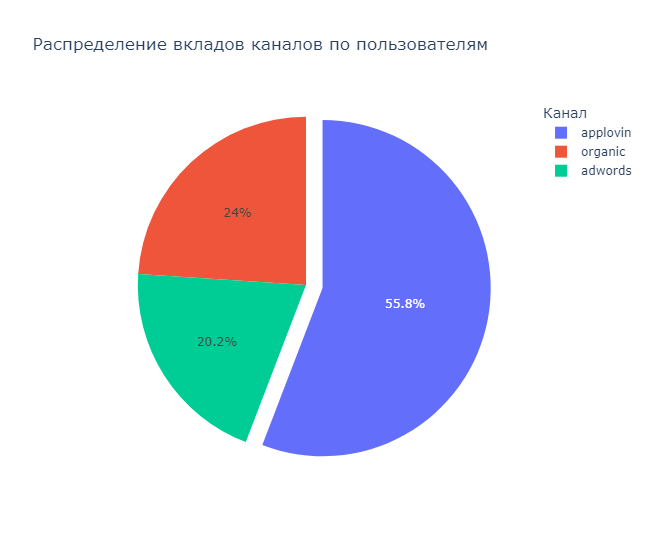

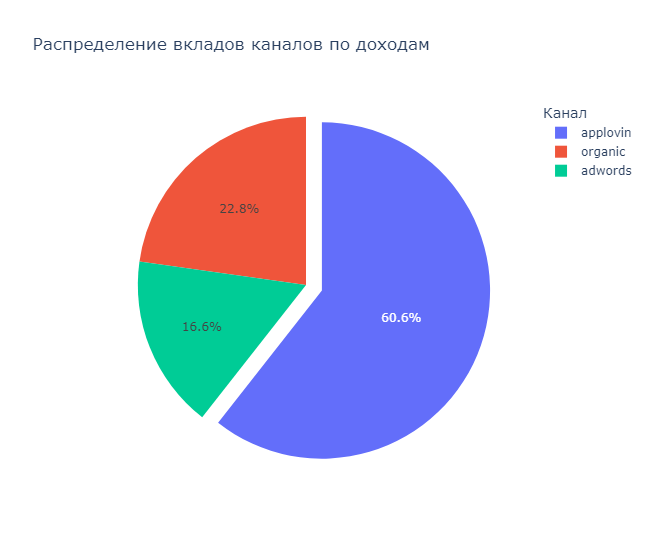

In [25]:
fig = go.Figure(data=[go.Pie(labels=last_click['channel'], 
                                    values=last_click['total_conversions'],
                                    pull = [0.1, 0])]
               )

fig.update_layout(title='Распределение вкладов каналов по пользователям', 
                  legend_title='Канал',
                  width=650, 
                  height=550,
                  )

static_image_bytes = pio.to_image(fig, format='png')
display(Image(static_image_bytes))

fig = go.Figure(data=[go.Pie(labels=last_click['channel'], 
                                    values=last_click['total_revenue'],
                                    pull = [0.1, 0])]
               )

fig.update_layout(title='Распределение вкладов каналов по доходам', 
                  legend_title='Канал',
                  width=650, 
                  height=550,
                  )

static_image_bytes = pio.to_image(fig, format='png')
display(Image(static_image_bytes))

Рекламный канал "AppLovin" приносит вносит максимальный вклад как по количеству уникальных пользователей, так и по общей сумме доходов.

### Выводы

- Около половины всех пользователей приложения (46 %) находятся в США. Наименьшее число фиксируется в Италии;
- Почти половина всех пользователей также располагаются во временных зонах городов США (46 %);
- Пользователи распределились практически равномерно между двумя мобильными платформами (ios и android). Чуть больше юзеров предпочитают ios (53 %);
- В целом, фиксируется постепенное увеличение ежемесячной выручки с транзакций в приложении (**Daily Revenue**) c марта по сентябрь 2023 года, однако в ноябре отмечается первый спад до уровня июля 2023 года;
- Отмечается постепенное увеличение количества уникальных пользователей, которые имели сессии в каждый день (**DAU**) вплоть до октября 2023 года. В последствии количество таких пользователей остается постоянным;
- В среднем **ARPDAU** сохраняется на протяжении всего времени, однако на графике вновь прослеживаются аномальные ежемесячные скачки;
- Средний уровень количества новых установок (**New Installs**) сохраняется по октябрь 2023 года, после чего фиксируется небольшой спад;
- Процент пользователей, которые вернулись в приложение на следующий день после установки (**Retention Rate**), в среднем, ведет себя достаточно стабильно на протяжении всего времени и изменяется в диапазоне от 19 до 40 %;
- Ежедневный коэффициент конверсии (**Daily Conversion Rate**) также ведет себя достаточно стабильно и сохраняется на уровне 5-6 %. Также вновь наблюдаются ежемесячные скачки метрики;
- Средняя выручка на пользователя, совершившего покупку (**ARPPU**), ведет себя достаточно стабильно на протяжении всего времени, сохраняясь на уровне 13$. Два раза в месяц отмечаются скачки метрики, причина которых, может быть, в сезонных ивентах;
- Рекламный канал "AppLovin" приносит вносит максимальный вклад как по количеству уникальных пользователей, так и по общей сумме доходов;
- На многих графиках отмечаются аномальные "скачки", имеющие различную периодичность. Характер таких "скачков" трудно выявить однозначно. Они могут совпадать с проведением акций/скидок, обновлением контента (новые уровни, персонажи или функции) или периодическими событиями (ивентами), что в свою очередь стимулирует пользователей на дополнительные покупки.

Для более точного анализа необходима информация о датах проведения маркетинговых компаний, которые могли стимулировать пользователей.